In [1]:
pip install pixellib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
tf.__version__

'2.3.0'

# Visualize

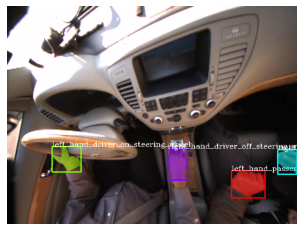

In [1]:
### Visualize a sample image before training###

import pixellib
from pixellib.custom_train import instance_custom_training

vis_img = instance_custom_training()
vis_img.load_dataset("data")
vis_img.visualize_sample()

# Train

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']="-1"

In [ ]:
###Training Code###

import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 5, batch_size = 4)
train_maskrcnn.load_pretrained_model("mask_rcnn_coco.h5")
train_maskrcnn.load_dataset("data")
train_maskrcnn.train_model(num_epochs = 30, augmentation=True,  path_trained_models = "mask_rcnn_models")

Using resnet101 as network backbone For Mask R-CNN model
Train 115 images
Validate 28 images
Applying augmentation on dataset
Checkpoint Path: D:\cours\INDP3\hand detection\mask_rcnn_models
Selecting layers to train
Epoch 1/30


D:\Anaconda3\lib\site-packages\tensorflow\python\framework\indexed_slices.py:431: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(


100/100 [==============================] - ETA: 0s - batch: 49.5000 - size: 4.0000 - loss: 0.8511 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.1170 - mrcnn_class_loss: 0.1723 - mrcnn_bbox_loss: 0.1951 - mrcnn_mask_loss: 0.3534 WARNING:tensorflow:From D:\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
100/100 [==============================] - 6352s 64s/step - batch: 49.5000 - size: 4.0000 - loss: 0.8511 - rpn_class_loss: 0.0132 - rpn_bbox_loss: 0.1170 - mrcnn_class_loss: 0.1723 - mrcnn_bbox_loss: 0.1951 - mrcnn_mask_loss: 0.3534 - val_loss: 0.6179 - val_rpn_class_loss: 0.0091 - val_rpn_bbox_loss: 0.0918 - val_mrcnn_class_loss: 0.2493 - val_mrcnn_bbox_loss: 0.1158 - val_mrcnn_mask_loss: 0.1519
Epoch 2/30
  1/100 [........

In [ ]:
###Evaluation Code

import pixellib
from pixellib.custom_train import instance_custom_training

train_maskrcnn = instance_custom_training()
train_maskrcnn.modelConfig(network_backbone = "resnet101", num_classes= 5)
train_maskrcnn.load_dataset("data")
train_maskrcnn.evaluate_model("./mask_rcnn_models/mask_rcnn_model.001-0.617862.h5")

# Image test

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']="-1"

In [71]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 5, class_names= ["BG", "right_hand_driver_on_steering_wheel", 
                                                        "right_hand_driver_off_steering_wheel", 
                                                        "left_hand_driver_on_steering_wheel",
                                                        "right_hand_passenger", "left_hand_passenger"])

segment_image.load_model("./mask_rcnn_models/mask_rcnn_model.001-0.617862.h5")

class_names = np.array(["BG", "right_hand_driver_on_steering_wheel", 
                        "right_hand_driver_off_steering_wheel", 
                        "left_hand_driver_on_steering_wheel",
                        "right_hand_passenger", "left_hand_passenger"])

In [72]:
x=segment_image.segmentImage("1L_0011267_Q_6_2_5.png", show_bboxes=True, output_image_name="sample_out.jpg")
print(class_names[x[0]['class_ids']])

Processed Image saved successfully in your current working directory.
['squirrel' 'butterfly']


# Video live

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES']="-1"

In [3]:
import pixellib
from pixellib.instance import custom_segmentation

segment_image = custom_segmentation()
segment_image.inferConfig(num_classes= 5, class_names= ["BG", "right_hand_driver_on_steering_wheel", 
                                                        "right_hand_driver_off_steering_wheel", 
                                                        "left_hand_driver_on_steering_wheel",
                                                        "right_hand_passenger", "left_hand_passenger"])

segment_image.load_model("./mask_rcnn_model.001-0.617862.h5")  # Trained model

In [9]:
import cv2
import numpy as np
class_names = np.array(["BG", "right_hand_driver_on_steering_wheel", 
                        "right_hand_driver_off_steering_wheel", 
                        "left_hand_driver_on_steering_wheel",
                        "right_hand_passenger", "left_hand_passenger"])

font = cv2.FONT_HERSHEY_SIMPLEX 
danger_right = 0
capture = cv2.VideoCapture("video2.mp4")
while (capture.isOpened()):
    ret, frame = capture.read()
    result = segment_image.segmentFrame(frame, show_bboxes=True)
    print(class_names[result[0]['class_ids']])
    
    if("right_hand_driver_off_steering_wheel" in class_names[result[0]['class_ids']]):
        danger_right += 1
        
    if("right_hand_driver_on_steering_wheel" in class_names[result[0]['class_ids']]):
        danger_right = 0
        
    if(danger_right>20):
            cv2.putText(result[1], "danger", (10, 30), font, 0.8, (0, 0, 255), 2)
            with open("../hand_detection.txt", "w") as file: 
                file.write("danger")
    else:
        cv2.putText(result[1], "safe", (10, 30), font, 0.8, (0, 255, 0), 2)
        with open("../hand_detection.txt", "w") as file: 
            file.write("safe")
    
    cv2.imshow("frame", result[1])
    
    if cv2.waitKey(25) & 0xff == ord('q'):
          break
    
cv2.destroyAllWindows()
capture.release()

['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_steering_wheel']
['left_hand_driver_on_steering_wheel'
 'right_hand_driver_on_ste

In [7]:
cv2.destroyAllWindows()
capture.release()

# Labelme

In [2]:
pip install labelme

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'

  Created wheel for labelme: filename=labelme-4.5.6-py3-none-any.whl size=1464603 sha256=f5afa037833c1b84f62b5402c75a04e6e229f08ed3aec3a5fe1ee47684f04f22
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\01\bf\90\933f23698f0f905b1e802d206ef2d8c818cd21da222a67b9a4
  Created wheel for imgviz: filename=imgviz-1.2.2-py3-none-any.whl size=7673804 sha256=234fda535a730629d3d3298b7c126ea6a7397ce0c2fbe6e1f739bd1d962d4667
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\af\59\7b\518b81c742a8d442e47b4194e1e8ee3926c5bb472f9303b75c
Successfully built labelme imgviz


In [ ]:
!labelme